In [236]:
import scvelo as scv
import pickle
import pandas as pd
import numpy as np
import scanpy as sc
import scFunctions as sf

In [237]:
with open("../data/merge_velocity.pickle", 'rb') as f:
    merge = pickle.load(f)

In [263]:
DC_merge = merge[merge.obs["Population"].isin(["cDC1", "cDC2", "Mature_DC"]),]

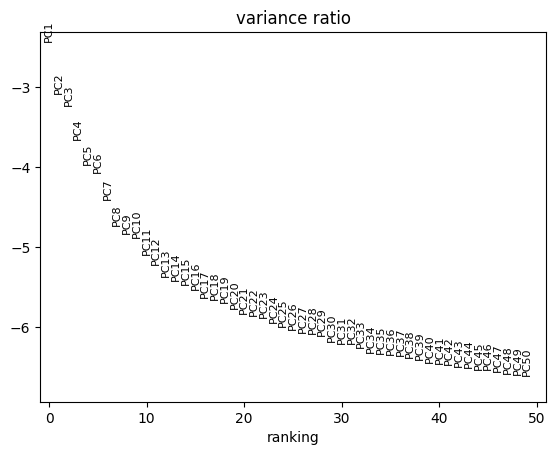

In [264]:
sc.pp.normalize_total(DC_merge)
sc.pp.log1p(DC_merge)
sc.pp.highly_variable_genes(DC_merge)
sc.tl.pca(DC_merge)
sc.pl.pca_variance_ratio(DC_merge, n_pcs=50, log=True)
sc.pp.neighbors(DC_merge, n_pcs = 20)
sc.tl.umap(DC_merge)
sc.tl.louvain(DC_merge, resolution = 0.5)

In [265]:
scv.pp.filter_genes(DC_merge)
scv.pp.normalize_per_cell(DC_merge)
scv.pp.filter_genes_dispersion(DC_merge)
scv.pp.log1p(DC_merge)

scv.pp.filter_and_normalize(DC_merge)
scv.pp.moments(DC_merge)

#scv.tl.umap(DC_merge)

#scv.tl.recover_dynamics(DC_merge)
#scv.tl.velocity(DC_merge, mode = "dynamical")
scv.tl.velocity(DC_merge)
scv.tl.velocity_graph(DC_merge)


Normalized count data: spliced, unspliced.
Extracted 2263 highly variable genes.


/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_971/1792711862.py:4: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(DC_merge)


Logarithmized X.
computing neighbors


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
    finished (0:00:56) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


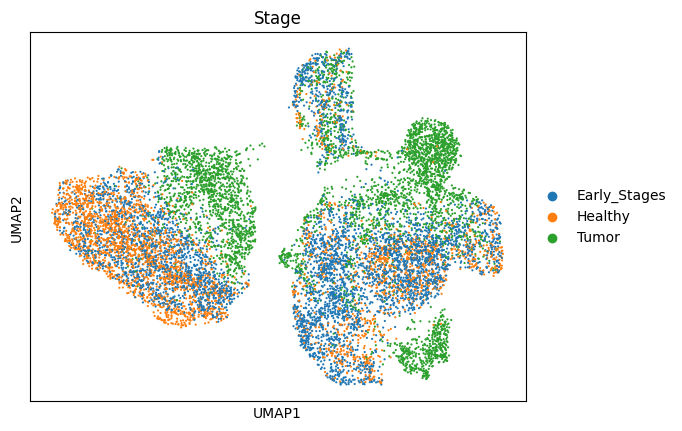

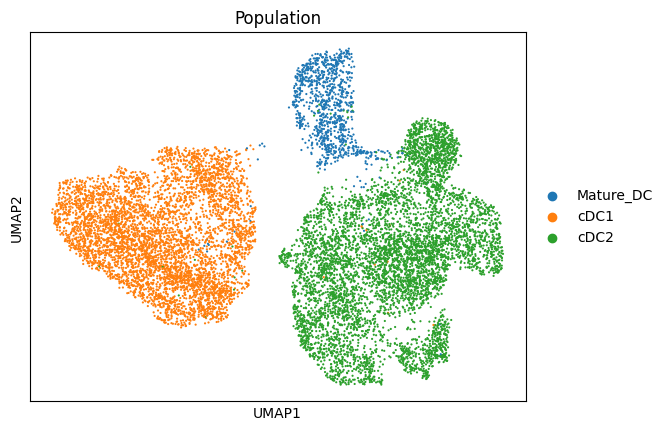

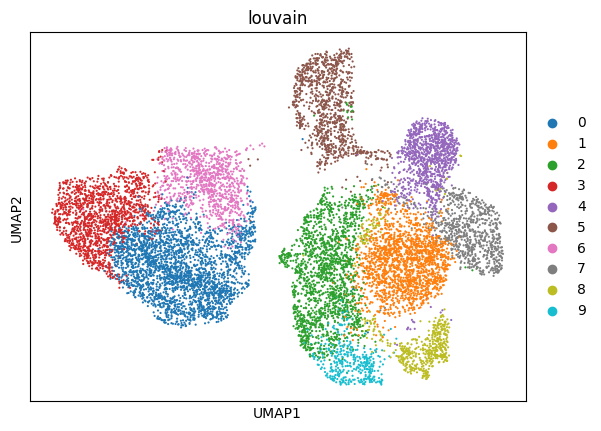

In [266]:
sc.pl.umap(DC_merge, color = 'Stage')
sc.pl.umap(DC_merge, color = 'Population')
sc.pl.umap(DC_merge, color = 'louvain')

computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

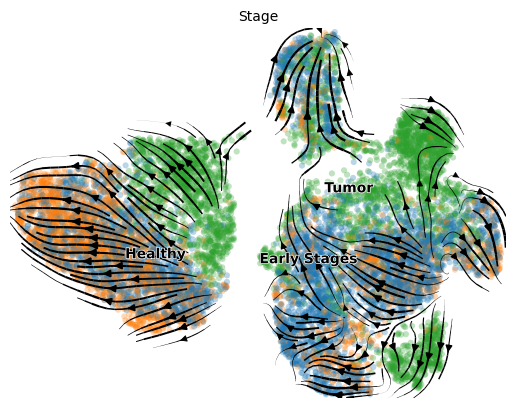

/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

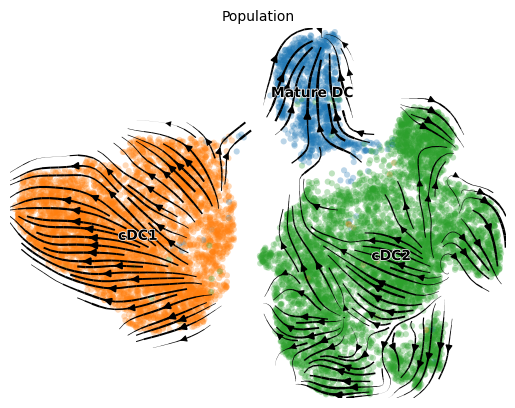

/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

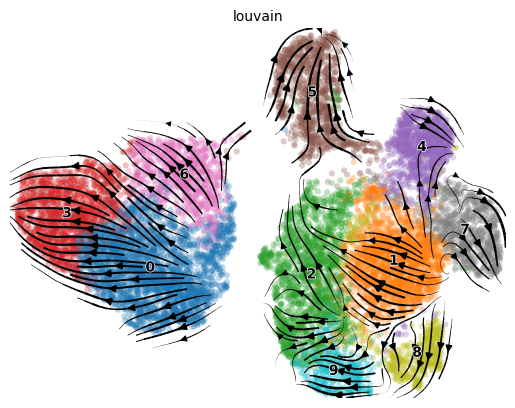

In [267]:
scv.pl.velocity_embedding_stream(DC_merge, basis='umap', color = "Stage")
scv.pl.velocity_embedding_stream(DC_merge, basis='umap', color = "Population")
scv.pl.velocity_embedding_stream(DC_merge, basis='umap', color = "louvain")

In [268]:
sc.tl.diffmap(DC_merge)
DC_merge.obsm["X_diffmap_2D"] = DC_merge.obsm["X_diffmap"][:,1:]

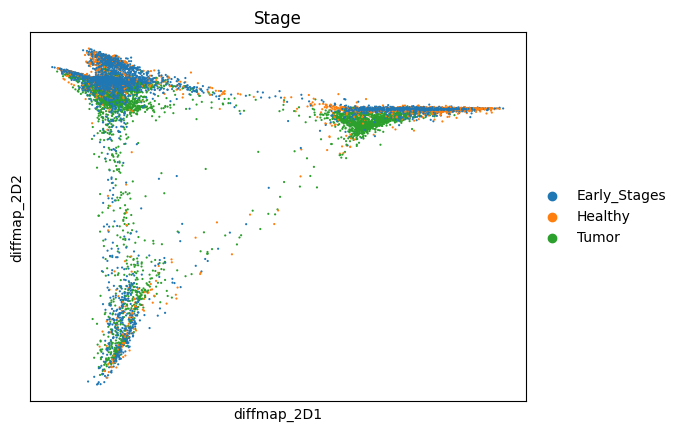

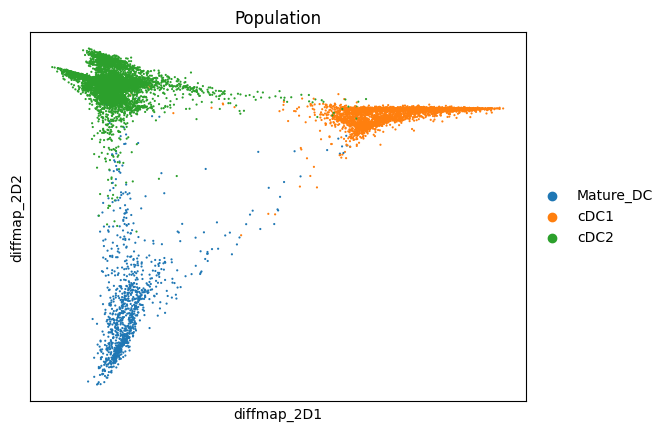

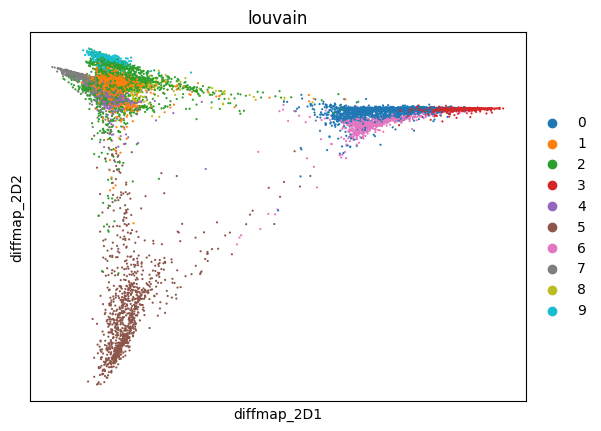

In [269]:
sc.pl.embedding(DC_merge, color = 'Stage', basis = "diffmap_2D")
sc.pl.embedding(DC_merge, color = 'Population', basis = "diffmap_2D")
sc.pl.embedding(DC_merge, color = 'louvain', basis = "diffmap_2D")

computing velocity embedding
    finished (0:00:03) --> added
    'velocity_diffmap', embedded velocity vectors (adata.obsm)


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

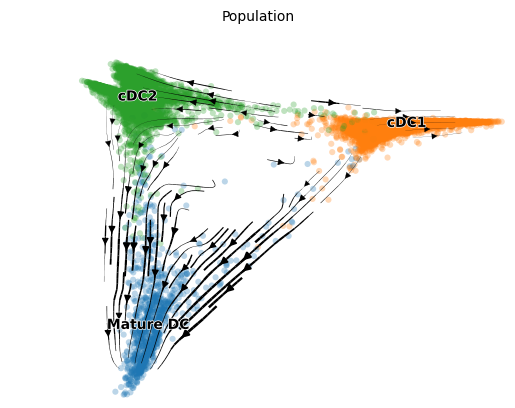

In [270]:
scv.pl.velocity_embedding_stream(DC_merge, basis='diffmap', color = "Population")

/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

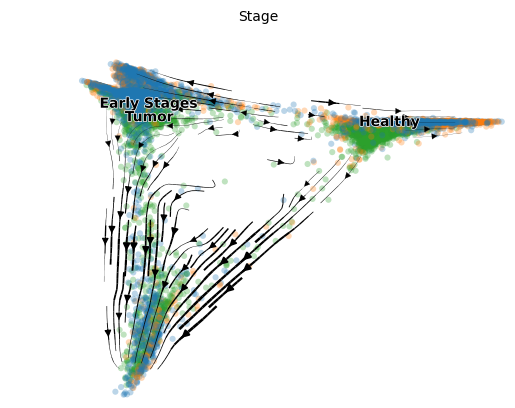

In [271]:
scv.pl.velocity_embedding_stream(DC_merge, basis='diffmap', color = "Stage")

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

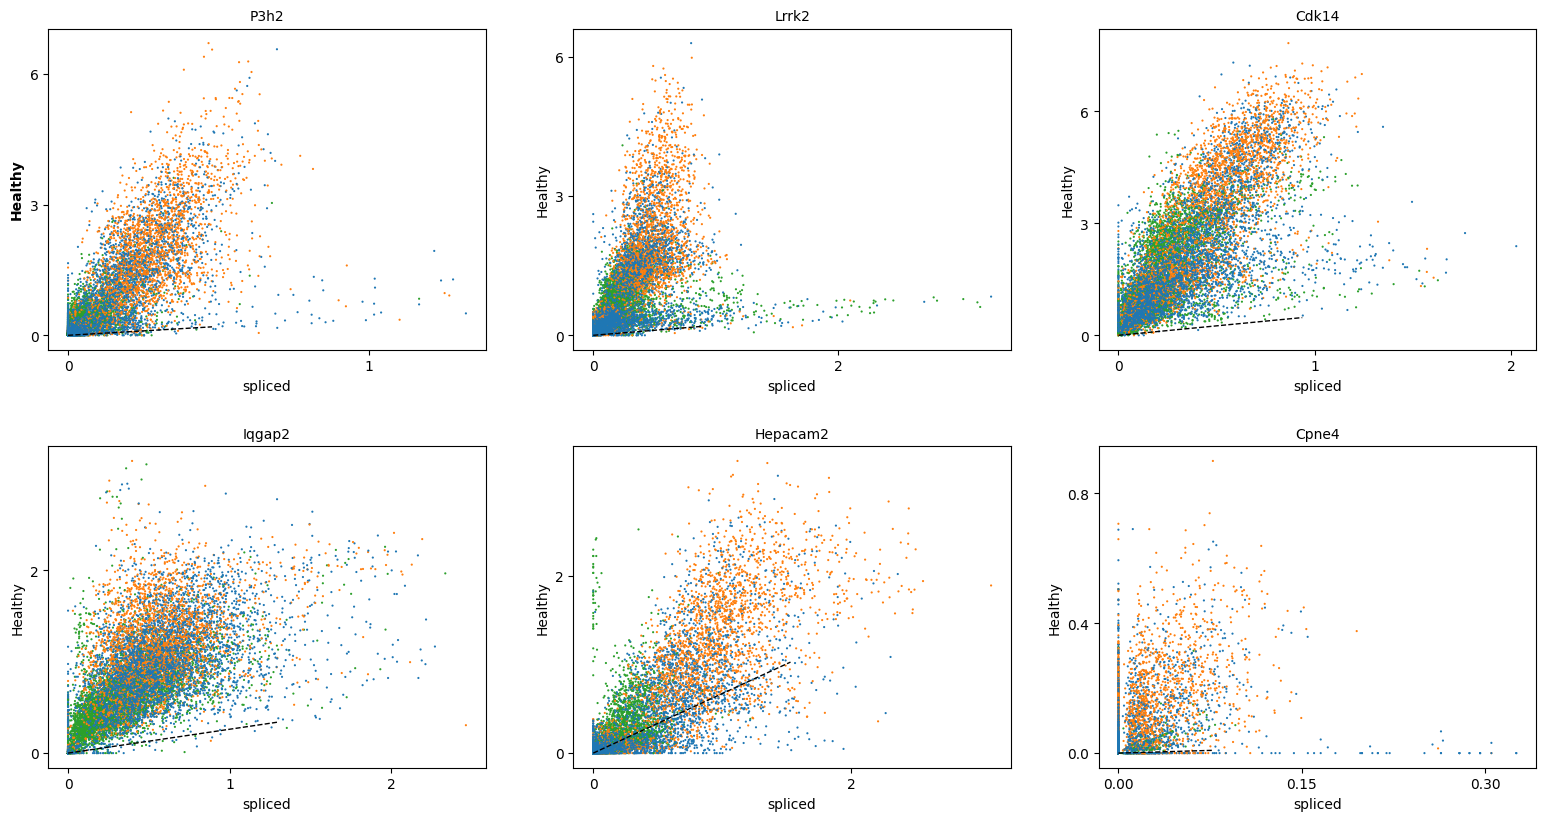

/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

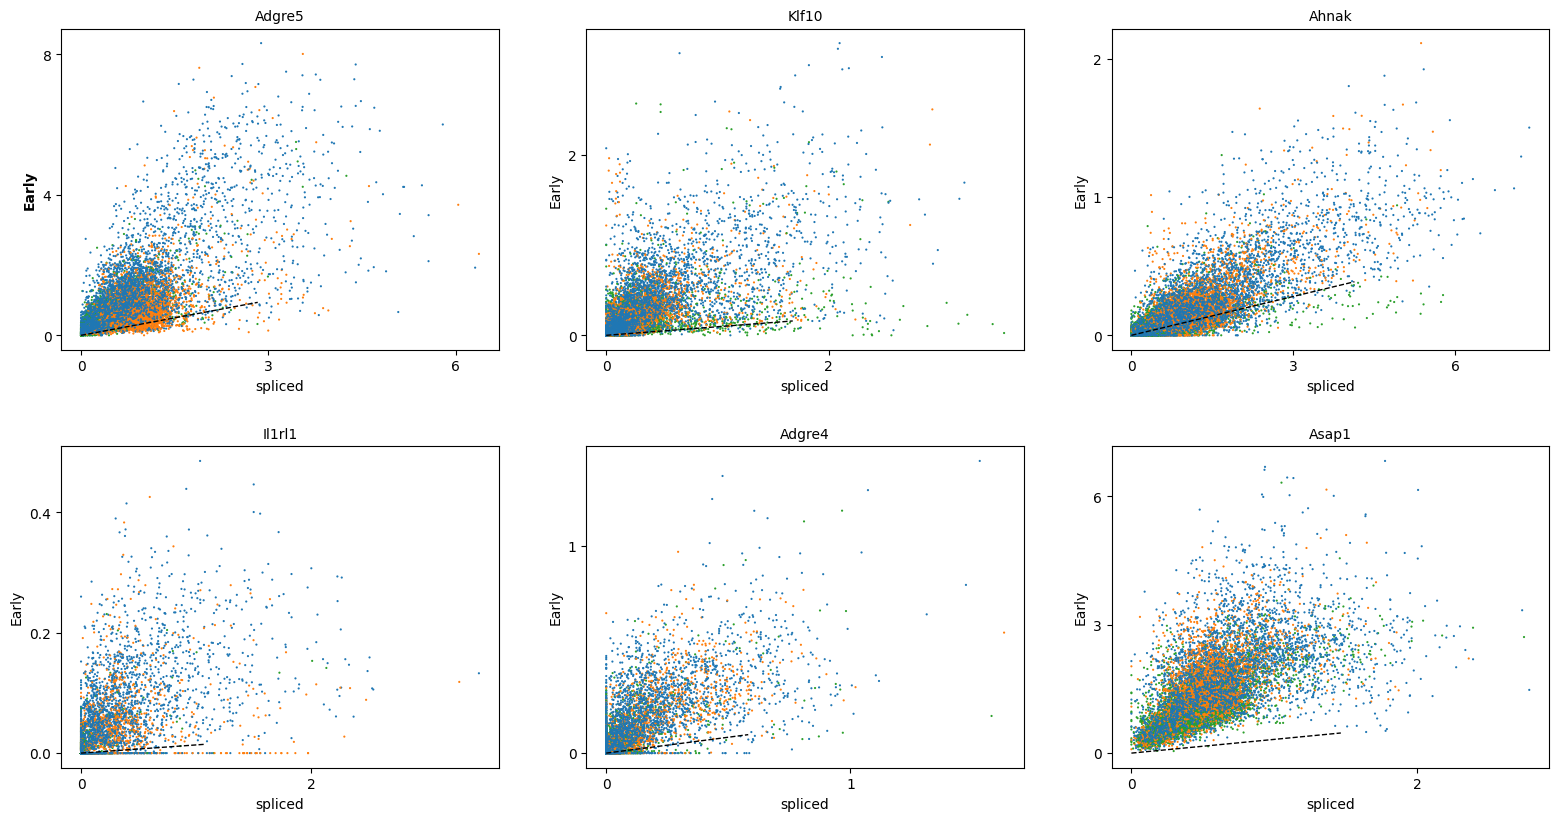

/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

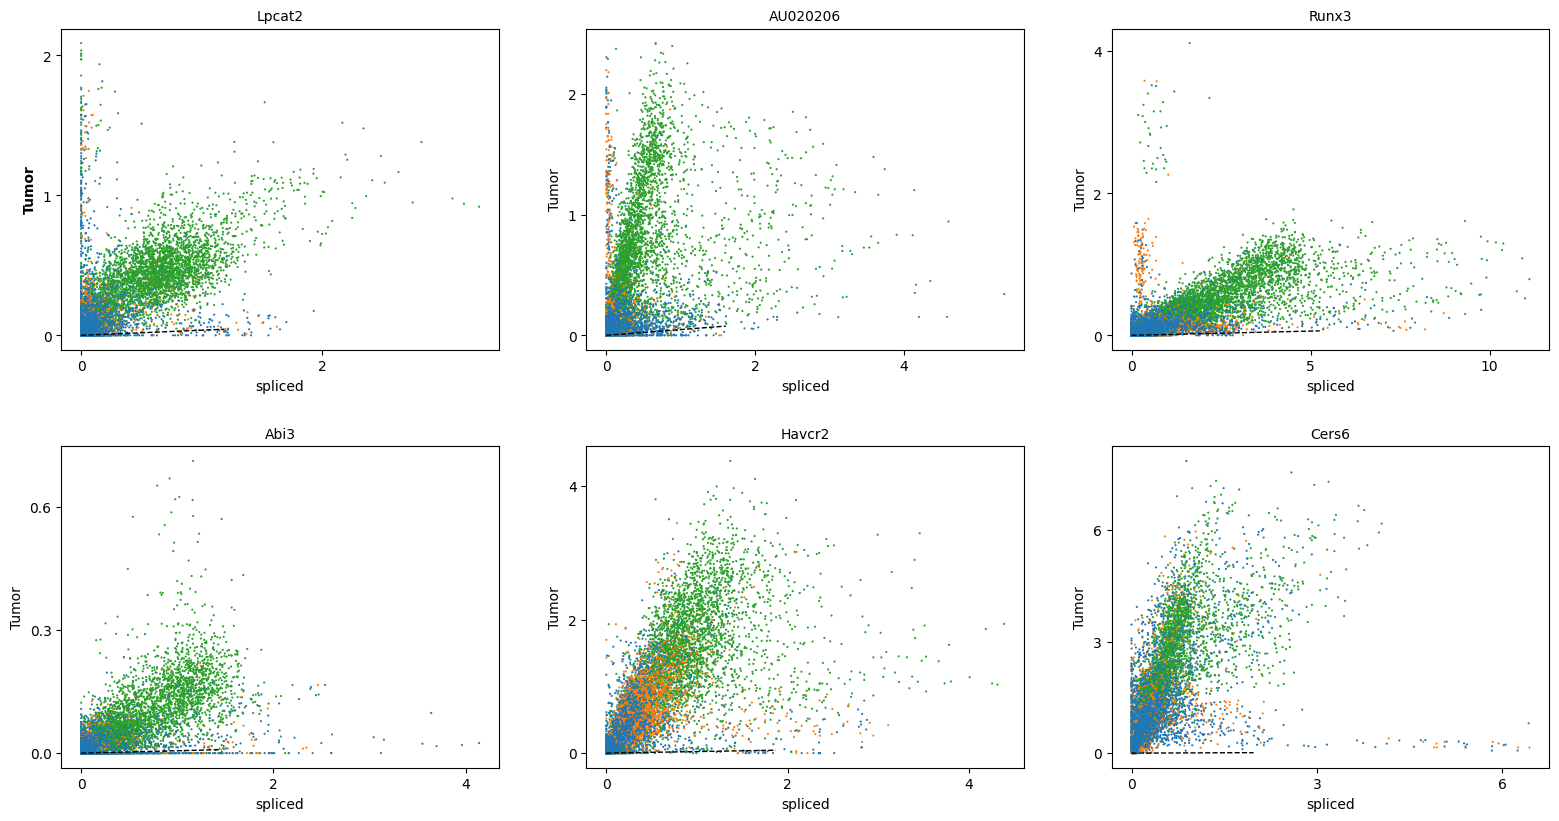

In [280]:
scv.tl.rank_velocity_genes(DC_merge, groupby='Stage', min_corr=.3)

df = pd.DataFrame(DC_merge.uns['rank_velocity_genes']['names'])
df.head()


scv.pl.scatter(DC_merge, df.head(6)["Healthy"].values, color = 'Stage', ylabel = 'Healthy', ncols=3)
scv.pl.scatter(DC_merge, df.head(6)["Early_Stages"].values, color = 'Stage', ylabel = "Early", ncols=3)
scv.pl.scatter(DC_merge, df.head(6)["Tumor"].values, color = 'Stage', ylabel = "Tumor", ncols=3)
#scv.pl.velocity(DC_merge, df.head(4)["Early_Stages"], ncols=2, groupby="Stage")
#scv.pl.velocity(DC_merge, df.head(4)["Tumor"], ncols=2, groupby="Stage")


> Healthy

**P3h2** : Downregulation of this gene may play a role in breast cancer

**Lrrk2** : This gene is a member of the leucine-rich repeat kinase family and encodes a protein with an ankryin repeat region, a leucine-rich repeat (LRR) domain, a kinase domain, a DFG-like motif, a RAS domain, a GTPase domain, a MLK-like domain, and a WD40 domain
Serine/threonine-protein kinase which phosphorylates a broad range of proteins involved in multiple processes such as neuronal plasticity, innate immunity, autophagy, and vesicle trafficking

**Cdk14** : Cell cycle

**Iqgap2** : This protein interacts with components of the cytoskeleton, with cell adhesion molecules, and with several signaling molecules to regulate cell morphology and motility. It also acts as a tumor suppressor and has been found to play a role in regulating innate antiviral responses

**Hepacam2** : This gene encodes a protein related to the immunoglobulin superfamily that plays a role in mitosis

**Cpne4** : May be involved in membrane trafficking, mitogenesis and development.

---

> Early

**Adgre5** :  (CD97) Mediates cell-cell interactions. The encoded protein may play a role in cell adhesion as well as leukocyte recruitment, activation and migration, and contains multiple extracellular EGF-like repeats which mediate binding to chondroitin sulfate and the cell surface complement regulatory protein CD55. Expression of this gene may play a role in the progression of several types of cancer.

**Klf10** : 
- Mouse -> Involved in cellular response to starvation and negative regulation of transcription, DNA-templated. Acts upstream of or within several processes, including bone mineralization; positive regulation of osteoclast differentiation; and somatic stem cell population maintenance.
- Human : -> The encoded protein is a transcriptional repressor that acts as an effector of transforming growth factor beta signaling. Activity of this protein may inhibit the growth of cancers, particularly pancreatic cancer.

**Ahnak** : 
- Mouse -> Enables structural molecule activity conferring elasticity. Involved in regulation of RNA splicing. Associated with neuroblastoma
- Human -> The encoded protein may play a role in such diverse processes as blood-brain barrier formation, cell structure and migration, cardiac calcium channel regulation, and tumor metastasis

**Il1rl1** : Enables interleukin-33 binding activity and interleukin-33 receptor activity. Involved in several processes, including negative regulation of T-helper 1 type immune response; positive regulation of macrophage activation; and regulation of cytokine production. Acts upstream of or within negative regulation of I-kappaB kinase/NF-kappaB signaling. Located in external side of plasma membrane and extracellular matrix. Is expressed in several structures, including immune system

**Adgre4** : Ortholog de ADGRE3 chez l'Homme -> This protein may play a role in myeloid-myeloid interactions during immune and inflammatory responses

**Asap1** : Enables GTPase activator activity; SH3 domain binding activity; and phospholipid binding activity. Acts upstream of or within negative regulation of dendritic spine development; positive regulation of membrane tubulation; and positive regulation of podosome assembly. Located in cell projection membrane; dendritic spine; and podosome. Associated with melanoma in Human

---

> Tumor

**Lpcat2** : Involved in membrane organization and platelet activating factor biosynthetic process. In Human, upon acute inflammatory stimulus, acetyltransferase activity is enhanced and PAF synthesis increases

**AU020206** : lncRNA

**Runx3** : Human ortholog(s) of this gene implicated in several diseases, including breast cancer , tumor suppressor.  Involved in several processes, including negative regulation of epithelial cell proliferation; negative regulation of transcription by RNA polymerase II; and regulation of alpha-beta T cell differentiation.

**Abi3** : 
- Mouse -> Predicted to enable SH3 domain binding activity and identical protein binding activity. Involved in defense response to tumor cell; negative regulation of lamellipodium assembly; and negative regulation of protein localization to plasma membrane
- Human -> The encoded protein inhibits ectopic metastasis of tumor cells as well as cell migration. This may be accomplished through interaction with p21-activated kinase. (Peut être up dans les non-migratory DC ducoup ?)

**Havcr2** : 
- Mouse : Predicted to enable metal ion binding activity. Involved in several processes, including regulation of cytokine production; regulation of leukocyte activation; and toll-like receptor signaling pathway. Located in cell surface; early endosome; and immunological synapse. 
- Human : This protein is a Th1-specific cell surface protein that regulates macrophage activation, and inhibits Th1-mediated auto- and alloimmune responses, and promotes immunological tolerance. 
- In the dataset : Up in tumor for cDC1, cDC2 and Langherans. Not expressed by cDC2 outside tumor

**Cers6** : 
- Mouse : Enables sphingosine N-acyltransferase activity. Acts upstream of or within ceramide biosynthetic process.
- Human : Ceramides generated by CERS6 play a role in inflammatory response

In [ ]:
# Peut être faire de l'enrichissement de gènes "differentiellement splicé" pour voir

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

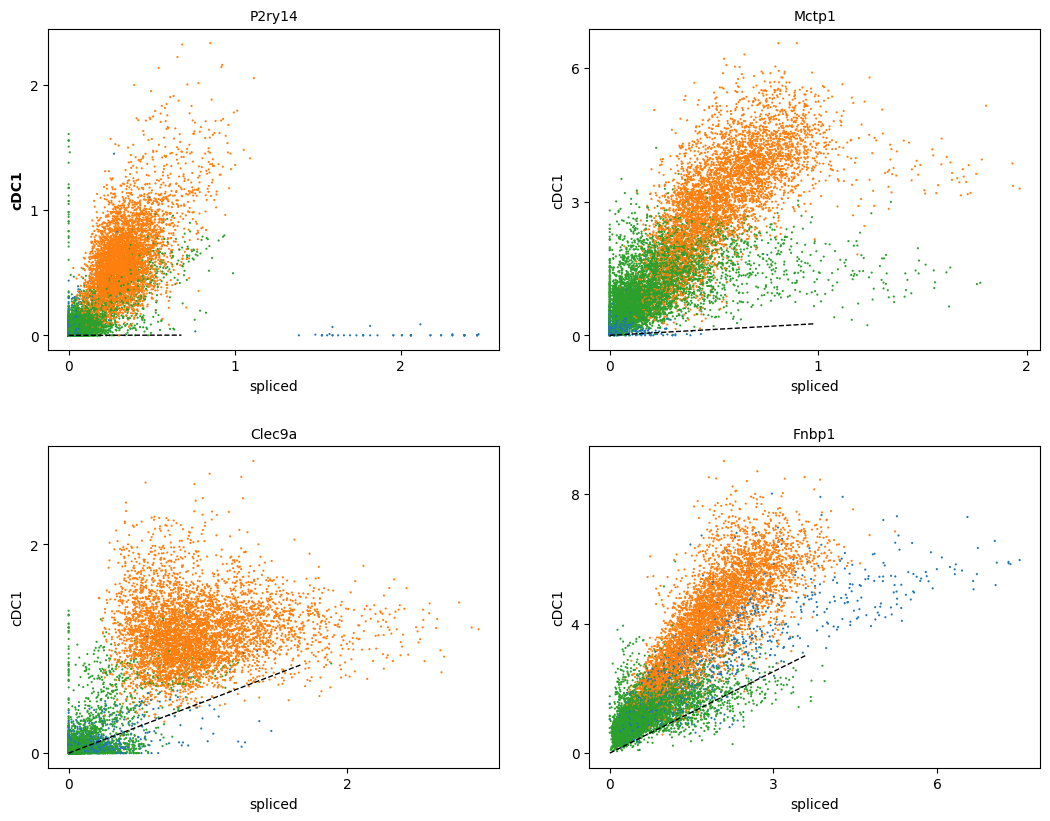

/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

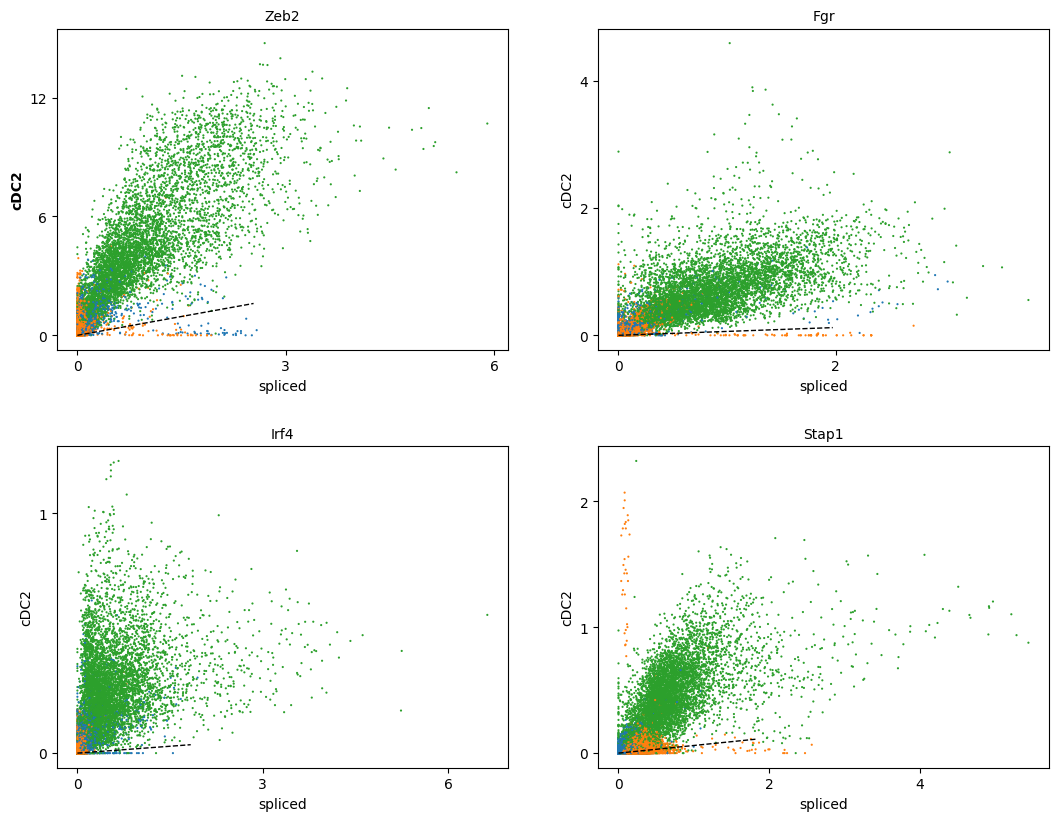

/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

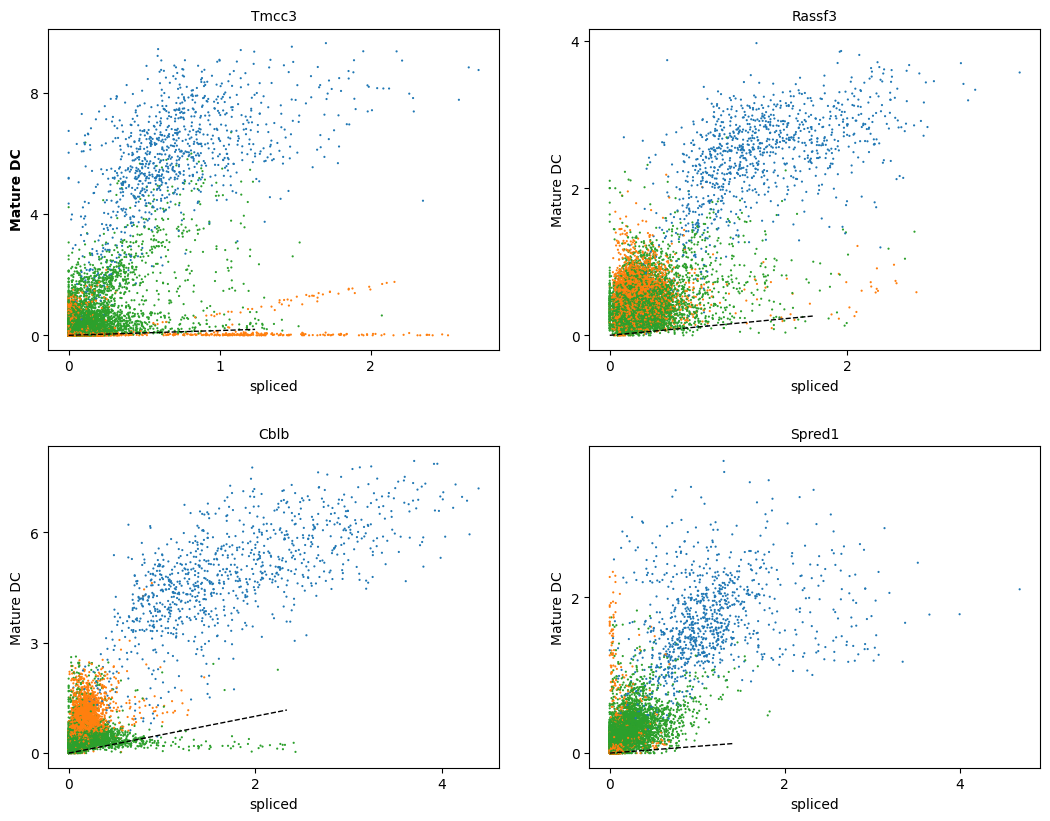

In [273]:
scv.tl.rank_velocity_genes(DC_merge, groupby='Population', min_corr=.3)

df = pd.DataFrame(DC_merge.uns['rank_velocity_genes']['names'])
df.head()
scv.pl.scatter(DC_merge, df.head(4)["cDC1"], color="Population", ncols = 2, ylabel = "cDC1")
scv.pl.scatter(DC_merge, df.head(4)["cDC2"], color="Population", ncols = 2, ylabel = "cDC2")
scv.pl.scatter(DC_merge, df.head(4)["Mature_DC"], color="Population", ncols = 2, ylabel = "Mature_DC")

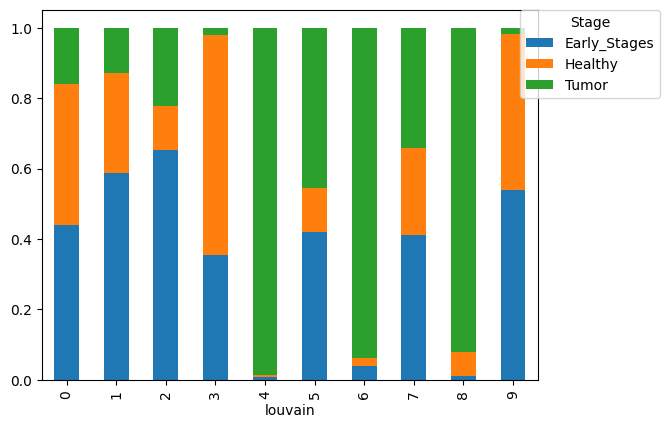

In [274]:
tmp = pd.crosstab(DC_merge.obs['Stage'],DC_merge.obs['louvain'], normalize='columns').T.plot(kind='bar', stacked=True)
tmp.legend(title='Stage', bbox_to_anchor=(1.26, 1.02),loc='upper right')

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

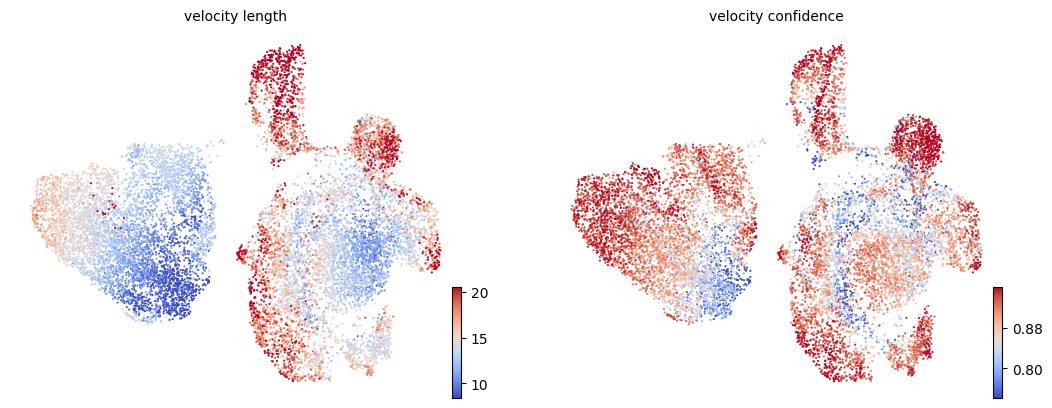

In [275]:
scv.tl.velocity_confidence(DC_merge)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(DC_merge, c=keys, cmap='coolwarm', perc=[5, 95])

In [276]:
import cytopath

In [277]:
scv.tl.terminal_states(DC_merge, random_state=123)
DC_merge.uns["T_forward"] = scv.utils.get_transition_matrix(DC_merge, self_transitions=False)


computing terminal states
    identified 1 region of root cells and 3 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


In [278]:
scv.tl.velocity_embedding(DC_merge)

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

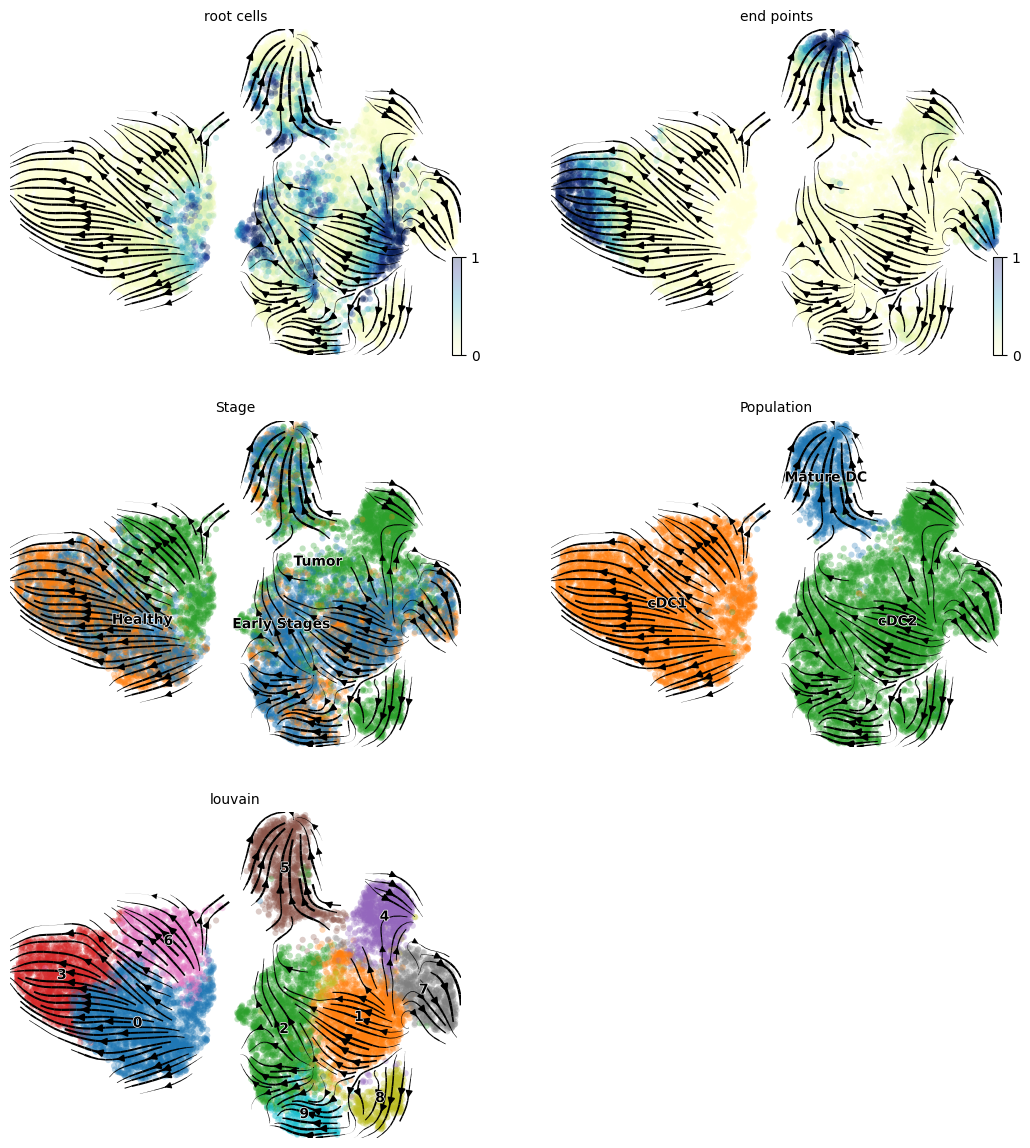

In [279]:
scv.pl.velocity_embedding_stream(DC_merge, color=['root_cells', 'end_points',
                                               'Stage', 'Population', "louvain"],
                                             ncols=2, color_map='YlGnBu')

In [281]:
# Run cytopath
import os

cytopath.sampling(DC_merge, num_cores=os.cpu_count()-1, max_iter = 800, max_steps=100)

#infer trajectories
cytopath.trajectories(DC_merge, num_cores=os.cpu_count()-1)

Adjusting simulation parameters based on dataset properties. Set auto_adjust=False if this is unwanted.
Number of required simulations per end point (traj_number) set to 819
Number of initial simulations (sim_number) set to 13141


Iterating state probability distributions: 100%|██████████| 800/800 [00:06<00:00, 118.76it/s]


Tolerance reached after 22 iterations of 800.
Number of initial simulation steps (max_steps) set to 22

Sampling round: 0


100%|██████████| 259/259 [00:13<00:00, 19.39it/s]


66.67 % of required simulations obtained for lagging end point 5.
5.0116 % of simulations reached atleast one endpoint. Generating 100 additional samples.

Sampling round: 1


100%|██████████| 259/259 [00:04<00:00, 55.17it/s]


Sampling done.
Calculating hausdorff distances


100%|██████████| 819/819 [00:11<00:00, 73.18it/s] 


Clustering using hausdorff distances
Forming trajectory by aligning clusters


100%|██████████| 2/2 [00:04<00:00,  2.29s/it]


Sample clustering done. Aligning clusters for end point 3
Calculating hausdorff distances


100%|██████████| 819/819 [00:11<00:00, 71.27it/s] 


Clustering using hausdorff distances
Forming trajectory by aligning clusters


100%|██████████| 2/2 [00:04<00:00,  2.19s/it]


Sample clustering done. Aligning clusters for end point 5
Computing neighborhoods of trajectories for end point 3 at each step


100%|██████████| 2/2 [00:04<00:00,  2.40s/it]


Computing alignment score of cells in trajectory neighborhood w.r.t. trajectories for end point  3


100%|██████████| 250/250 [00:42<00:00,  5.94it/s]


Removing cells below cutoff threshold from trajectories for end point  3 (i.e. cells neighborhood)


100%|██████████| 2/2 [00:00<00:00, 55.72it/s]


Computing neighborhoods of trajectories for end point 5 at each step


100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Computing alignment score of cells in trajectory neighborhood w.r.t. trajectories for end point  5


100%|██████████| 240/240 [00:18<00:00, 13.06it/s]


Removing cells below cutoff threshold from trajectories for end point  5 (i.e. cells neighborhood)


100%|██████████| 1/1 [00:00<00:00, 46.49it/s]


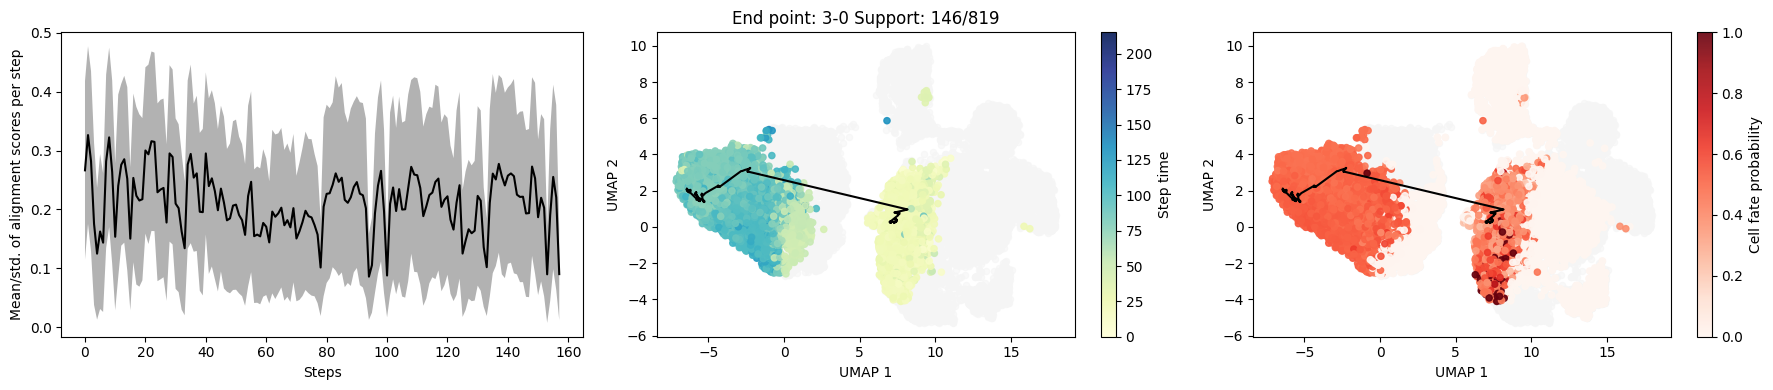

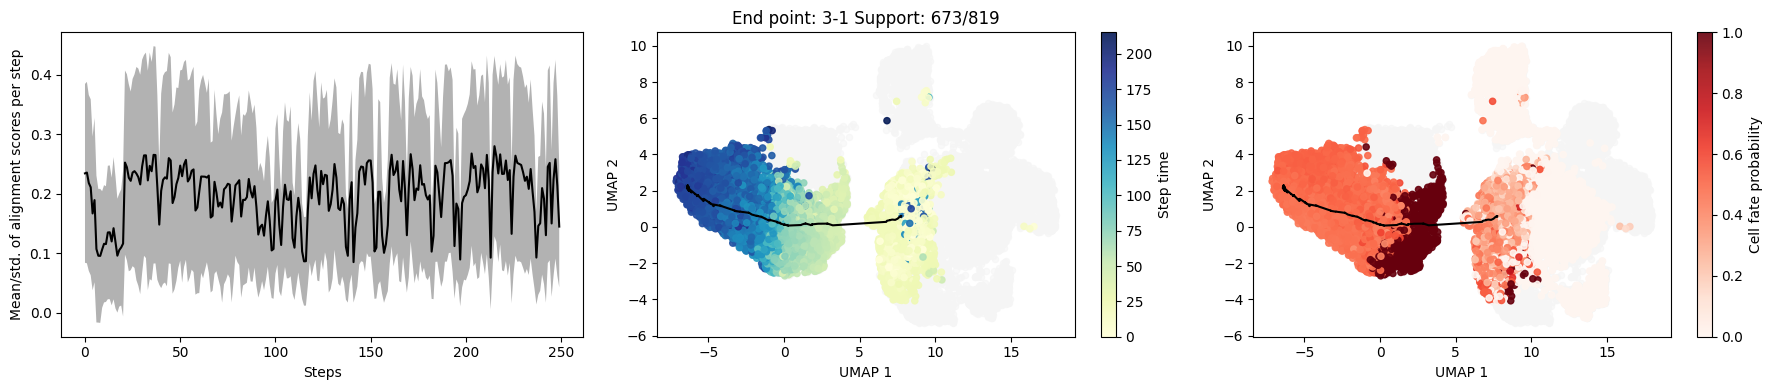

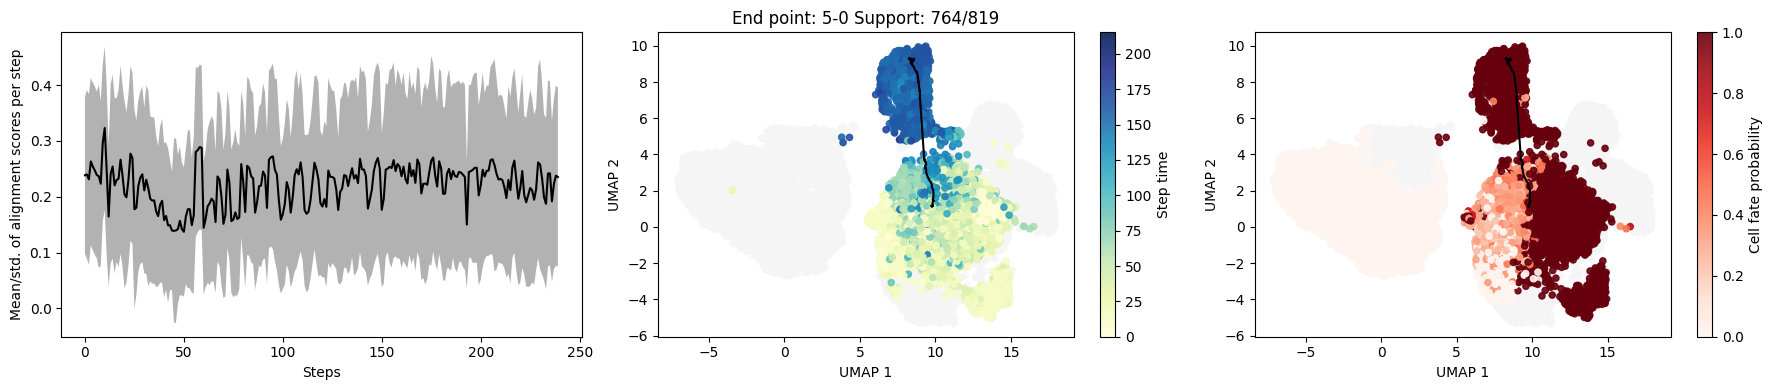

In [282]:
# Plot allignment and trajectories
cytopath.plot_trajectories(DC_merge, directory='', basis='umap', smoothing=False, size=20, figsize=(18,4))

/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

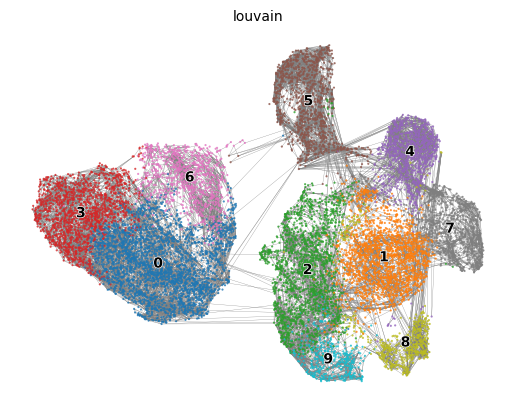

In [283]:
scv.pl.velocity_graph(DC_merge, threshold=.1)


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

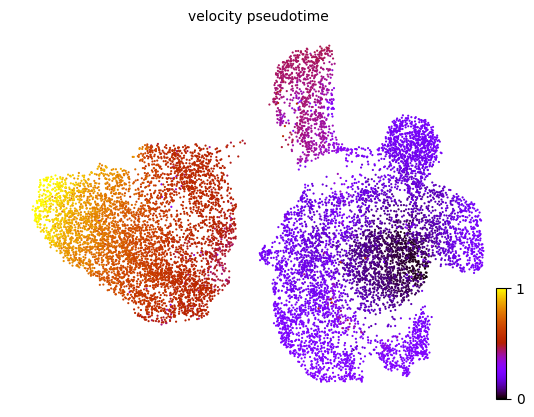

In [288]:
scv.tl.velocity_pseudotime(DC_merge)
scv.pl.scatter(DC_merge, color='velocity_pseudotime', cmap='gnuplot')

In [289]:

# this is needed due to a current bug - bugfix is coming soon.
DC_merge.uns['neighbors']['distances'] = DC_merge.obsp['distances']
DC_merge.uns['neighbors']['connectivities'] = DC_merge.obsp['connectivities']

scv.tl.paga(DC_merge, groups='louvain')
df = scv.get_df(DC_merge, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/core/_anndata.py:245: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(data.obs[key])


/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/mscavino/miniconda3/envs/scvelo/lib/python

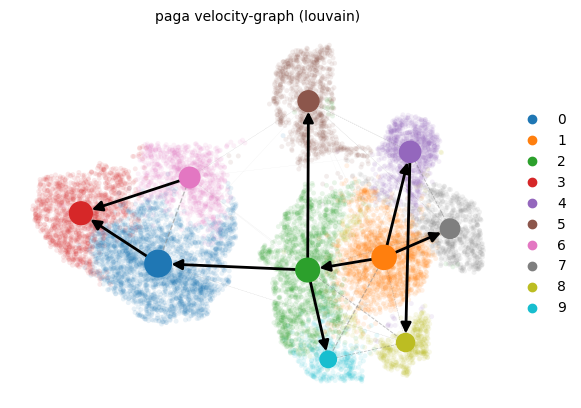

In [286]:
scv.pl.paga(DC_merge, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)